# Workflow for Class Cell_Data

by Pu Zheng

2018.10.11

## 0.imports

In [339]:
%run "E:\Users\puzheng\Documents\Startup_py3.py"
sys.path.append(r"E:\Users\puzheng\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import get_img_info, visual_tools, corrections

### 0.1 old info imports, just for checking purposes

In [470]:
# master folder for this dataset:
master_folder = r'Z:/20180911-IMR90_whole-chr21'
# get Folders, Field-of-views
folders, fovs = ia.get_img_info.get_folders(master_folder, feature='H', verbose=True)
# analysis
analysis_folder=master_folder+os.sep+'Analysis'

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65


## 1. Create Cell_Data item

In [1059]:
reload(ia.get_img_info)
reload(ia.analysis)
reload(ia.corrections)
reload(ia.visual_tools)
reload(ia.classes)

<module 'ImageAnalysis3.classes' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes.py'>

### 1.0 create cell_data class and load basic info

In [1060]:
# specify initialization parameters:
param = {'data_folder':'Z:/20180911-IMR90_whole-chr21',
         'fov_id': 1,
         'cell_id': 1,
         'temp_folder': r'I:\Pu_temp',
         };
# initialize cell_data class:
a = ia.classes.Cell_Data(param)

# load color_usage
a._load_color_info();
# load encoding_scheme
a._load_encoding_scheme();

Get Folder Names: (ia.get_img_info.get_folders)
- Number of folders: 127
- Number of field of views: 65
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
127 folders are found according to color-usage annotation.
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Color_Usage.csv
- header: ['Hyb', '750', '647', '561', '488', '405']
-- Hyb H0R0 exists in this data
-- DAPI exists in hyb: H0R0
- Importing csv file: Z:/20180911-IMR90_whole-chr21\Analysis\Encoding_Scheme.csv
-- hyb per group: 5
-- region per group: 10
-- colors: ['750', '647', '561']
-- number of groups: [22, 22, 22]


### 1.1 Load more info for cell

In [1061]:
# load existing cell_info, dont run for the first time
a._load_from_file('cell_info')
# load segmentation
a._load_segmentation(_denoise_window=0);
# load drift info
drift = a._load_drift(_size=650, _dynamic=True)


- load segmentation result from filename: Z:/20180911-IMR90_whole-chr21\Analysis\segmentation\Conv_zscan_01_segmentation.pkl
- drift already exists for cell:1, skip


### 1.2 Load images from raw data

In [6]:
# load beads images
#bead_ims, bead_names = a._load_images('beads', _chromatic_correction=False, _load_in_ram=True)

# load raw un-cropped images
#splitted_ims = a._load_images('raw') 

# load cropped unique images:
unique_ims, unique_ids, unique_channels = a._load_images('unique', _verbose=True, _save=True)

# load cropped combo images:
#combo_groups = a._load_images('combo')

Loading unique images for cell:3 in fov:1
- get images of a fov (ia.get_img_info.get_img_fov)
-- loading field of view: Conv_zscan_01.dax
- number of images loaded: 127
Split multi-channel images (ia.get_img_info.split_channels)
-- number of channels: 4
-- scanning through images to find images with DAPI:
--- DAPI images discovered, splitting images
-- Loading all images for this fov
--- start image correction with 5 threads, chunk_size=5
--- time cost for this correction: 307.09372425079346
-- loading unique region 279 at H135RU1 and color 750 
-- loading unique region 280 at H135RU1 and color 647 
-- loading unique region 278 at H135RU1 and color 561 
-- loading unique region 282 at H136RU2 and color 750 
-- loading unique region 283 at H136RU2 and color 647 
-- loading unique region 281 at H136RU2 and color 561 
-- loading unique region 285 at H137RU3 and color 750 
-- loading unique region 286 at H137RU3 and color 647 
-- loading unique region 284 at H137RU3 and color 561 
-- loadi

### 1.3 Save to file 

In [974]:
#a._save_to_file('all') # save all

a._save_to_file('cell_info') # save all cell_info exclude images
#a._save_to_file('cell_info', _save_dic={'distance_zxy':a.distance_zxy}) # save specifically this variable

#a._save_to_file('unique') # save unique info into unique_rounds.npz

#a._save_to_file('combo') # save combo_groups into Harry's format

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['distance_reference']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl


### 1.4 Load from files

In [1055]:
a._load_from_file('unique', _overwrite=False)
# similar examples for combo and all

- Loading unique from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\unique_rounds.npz
loading image with unique_id: 278
loading image with unique_id: 279
loading image with unique_id: 280
loading image with unique_id: 281
loading image with unique_id: 282
loading image with unique_id: 283
loading image with unique_id: 284
loading image with unique_id: 285
loading image with unique_id: 286
loading image with unique_id: 287
loading image with unique_id: 288
loading image with unique_id: 289
loading image with unique_id: 290
loading image with unique_id: 291
loading image with unique_id: 292
loading image with unique_id: 293
loading image with unique_id: 294
loading image with unique_id: 295
loading image with unique_id: 296
loading image with unique_id: 297
loading image with unique_id: 298
loading image with unique_id: 299
loading image with unique_id: 300
loading image with unique_id: 301
loading image with unique_id: 302
loading image with unique_id: 303
loading image

## 2. Generate and Pick chromosome

### 2.1 generate and identify chromosome

C:\Users\puzheng\AppData\Local\anaconda3\lib\site-packages\skimage\segmentation\random_walker_segmentation.py:361: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


<IPython.core.display.Javascript object>


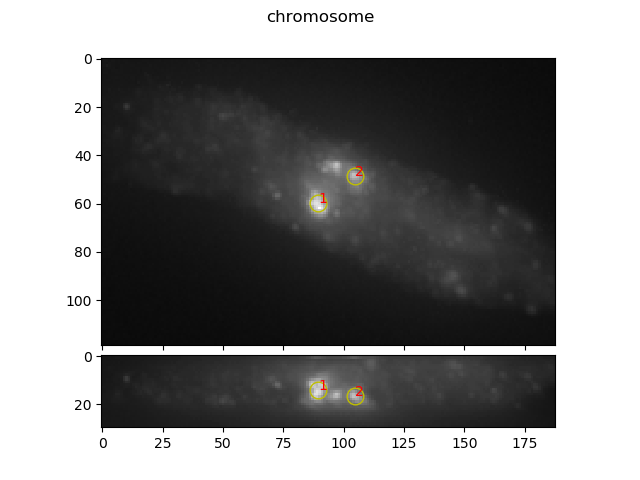

In [1025]:
# generate
a._generate_chromosome_image('unique')
# identify
a._identify_chromosomes();
# manually pick for only this cell
a._pick_chromosome_manual()

# then do manual picking and close the matplotlib notebook inferface.

### 2.2 Update chromosome coordinate info

In [1026]:
a._update_chromosome_from_file();

-- 2 loaded


## 3. Fitting and picking spots

### 3.1 multi-fitting

In [484]:
a._multi_fitting(_max_seed_count=0, _min_seed_count=3)

+ Start multi-fitting for unique images
++ fitting for fov:1, cell:1, region:278
-- Multi-Fitting:3 points
-- Multi-Fitting:3 points
++ fitting for fov:1, cell:1, region:279
-- Multi-Fitting:4 points
-- Multi-Fitting:4 points
++ fitting for fov:1, cell:1, region:280
-- Multi-Fitting:7 points
-- Multi-Fitting:4 points
++ fitting for fov:1, cell:1, region:281
-- Multi-Fitting:3 points
-- Multi-Fitting:4 points
++ fitting for fov:1, cell:1, region:282
-- Multi-Fitting:3 points
-- Multi-Fitting:3 points
++ fitting for fov:1, cell:1, region:283
-- Multi-Fitting:3 points
-- Multi-Fitting:3 points
++ fitting for fov:1, cell:1, region:284
-- Multi-Fitting:3 points
-- Multi-Fitting:4 points
++ fitting for fov:1, cell:1, region:285
-- Multi-Fitting:4 points
-- Multi-Fitting:6 points
++ fitting for fov:1, cell:1, region:286
-- Multi-Fitting:5 points
-- Multi-Fitting:4 points
++ fitting for fov:1, cell:1, region:287
-- Multi-Fitting:3 points
-- Multi-Fitting:3 points
++ fitting for fov:1, cell:1, 

[[array([[3.04391212e+03, 1.30000000e+01, 5.80000000e+01, 9.80000000e+01,
          2.01367852e+03, 1.35000000e+00, 1.90000000e+00, 1.90000000e+00],
         [8.80650361e+02, 1.36570861e+01, 5.59220712e+01, 8.78073790e+01,
          1.00274520e+03, 1.73510962e+00, 2.64977885e+00, 1.89999978e+00]]),
  array([[3.04467930e+03, 1.30000000e+01, 5.80000000e+01, 9.80000000e+01,
          2.01289881e+03, 1.35000000e+00, 1.90000000e+00, 1.90000000e+00],
         [2.19317562e+03, 1.60000000e+01, 4.30000000e+01, 1.00000000e+02,
          1.69799164e+03, 1.35000000e+00, 1.90000000e+00, 1.90000000e+00],
         [8.83351611e+02, 1.36526782e+01, 5.59216401e+01, 8.78071789e+01,
          1.00187306e+03, 1.73599137e+00, 2.64730713e+00, 1.89999006e+00]])],
 [array([[9.04997499e+02, 1.60000000e+01, 6.10000000e+01, 8.80000000e+01,
          4.59499696e+02, 1.35000000e+00, 1.90000000e+00, 1.90000000e+00],
         [6.69697359e+02, 1.79783328e+01, 4.42099803e+01, 9.88875380e+01,
          2.47197792e+02, 1

### 3.2 picking spots by intensity

In [1064]:
naive_picked_pts = a._naive_picking_spots(_save=False)

+ Pick unique spots for by brightness in fov:1, cell:1


#### 3.2.1 distance map for one chromosome

In [1065]:
import matplotlib
from scipy.spatial.distance import pdist,squareform

chrom_id = 1;
print(f"chromosome id:{chrom_id}, coordinate:{a.chrom_coords[chrom_id]}");
# extract coordinates
coords_in_pxl = np.stack([s[1:4] for s in naive_picked_pts[chrom_id]]) # extract only coordnates 
# convert to nm
coords_in_nm = coords_in_pxl * a.distance_zxy
# calculate distance map
distmap = squareform(pdist(coords_in_nm))

chromosome id:1, coordinate:[ 14.5         66.93701335 100.45123488]


<IPython.core.display.Javascript object>


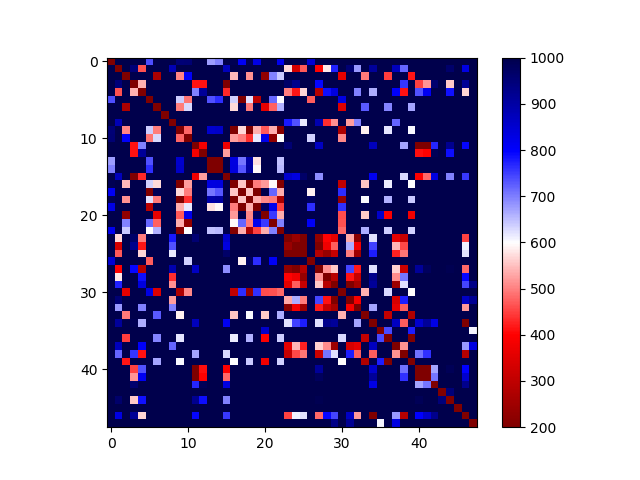

In [1066]:
plt.figure()
plt.imshow(distmap, interpolation='nearest', cmap=matplotlib.cm.seismic_r, vmin=200, vmax=1000)
plt.colorbar()

### 3.3 dynamic picking spots

In [1062]:
dynamic_picked_pts = a._dynamic_picking_spots(_w_dist=2)

+ Pick unique spots for by brightness in fov:1, cell:1
- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['picked_unique_spots']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl


++ generate unique dist-map for fov:1, cell:1, chrom:0


<IPython.core.display.Javascript object>


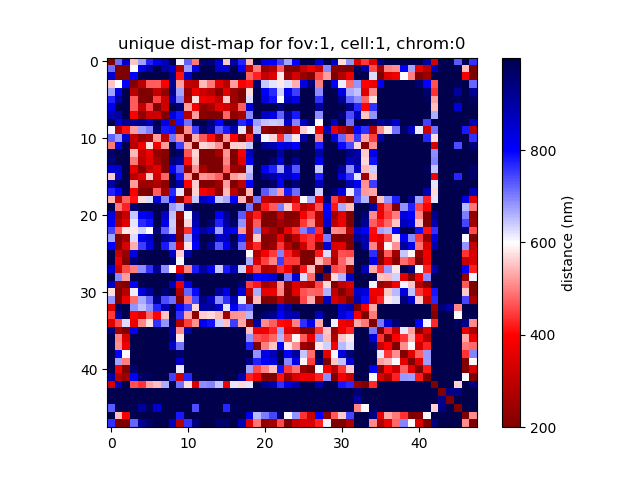

++ generate unique dist-map for fov:1, cell:1, chrom:1


<IPython.core.display.Javascript object>


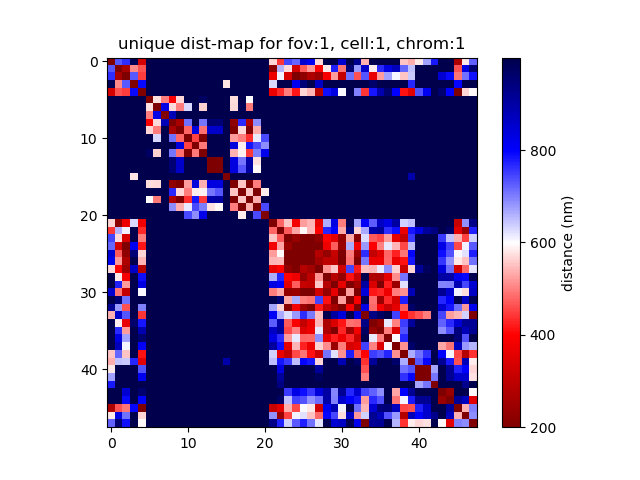

- Save cell_info to: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- loading existing info from file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl
-- information updated in cell_info.pkl: ['unique_distance_map', 'unique_distance_map']
- Writing cell data to file: Z:/20180911-IMR90_whole-chr21\Analysis\5x10\fov-1\cell-1\cell_info.pkl


In [1063]:
distmaps = a._generate_distance_map()